In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


C:\Users\HP\AppData\Local\Temp\ipykernel_1980\2465351344.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
#Loading the dataset

df = pd.read_excel(r"Ch3.ClevelandData.xlsx")


In [17]:
#Checking the top 10 records of DF
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [18]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [19]:
#Shape of the Dataset
print("Numbers of Rows :" ,df.shape[0])
print("Numbers of Columns :" ,df.shape[1])

Numbers of Rows : 303
Numbers of Columns : 14


In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'hal', 'HeartDisease'],
      dtype='object')

In [21]:
df.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
hal              object
HeartDisease      int64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hal           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [23]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df['ca']= df['ca'].replace("?",np.NaN)
df['hal']= df['hal'].replace("?",np.NaN)

In [26]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [27]:
df['hal'].value_counts()

hal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [28]:

# Replace NaN with 0 in the 'ca' column
df['ca'] = df['ca'].fillna(0)
# Replace NaN with 0 in the 'ca' column
df['hal'] = df['hal'].fillna(3)
# Convert the 'ca' column to np.float64
df['ca'] = df['ca'].astype(np.float64)
# Convert the 'ca' column to np.float64
df['hal'] = df['hal'].astype(np.float64)

In [29]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [31]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


EXPLORATORY DATA ANALYSIS

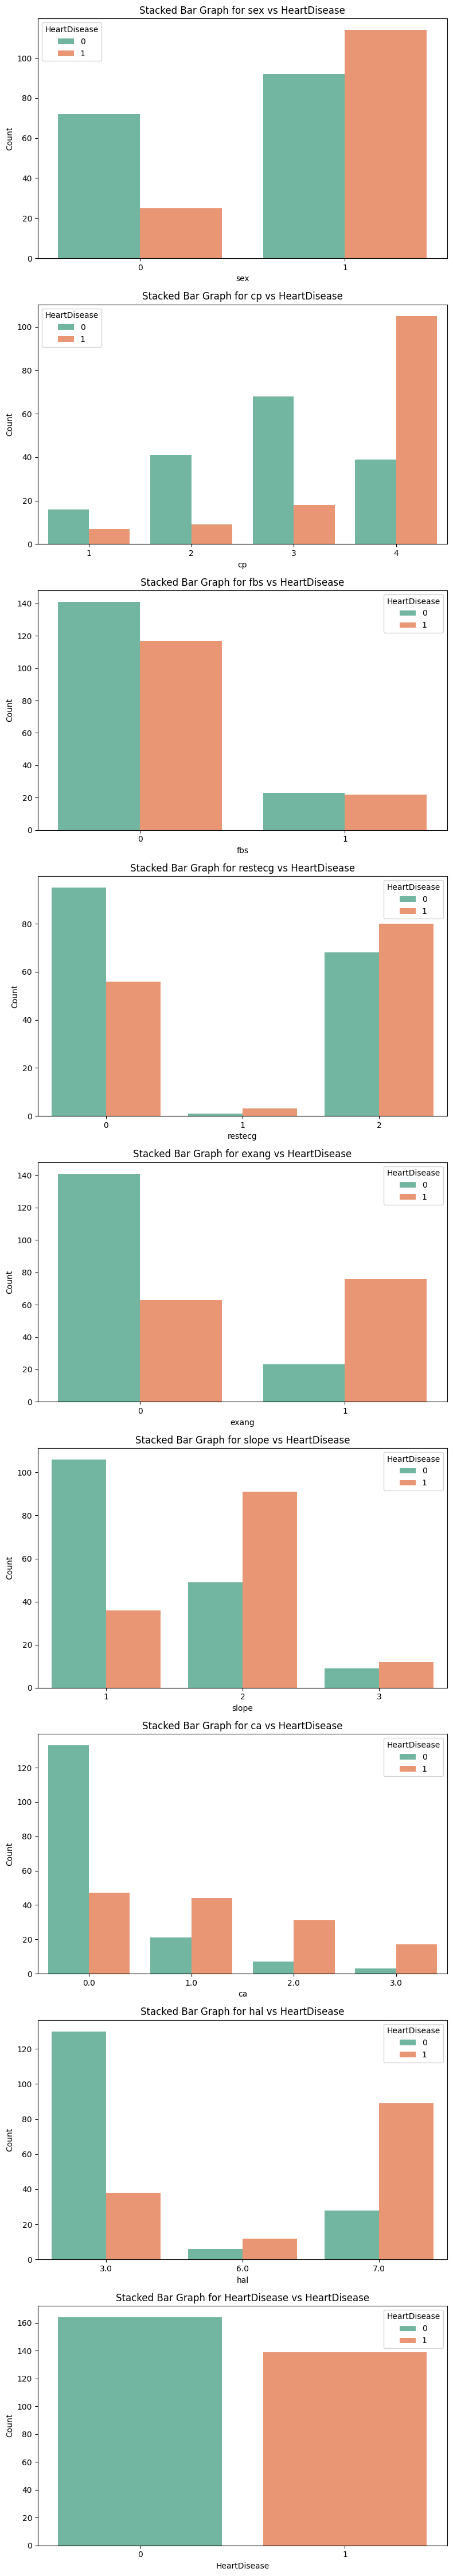

In [32]:
# List of columns to create stacked bar graphs
columns_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'hal', 'HeartDisease']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 5 * len(columns_to_plot)))

# Create stacked bar graphs using matplotlib and seaborn
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='HeartDisease', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Stacked Bar Graph for {column} vs HeartDisease')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

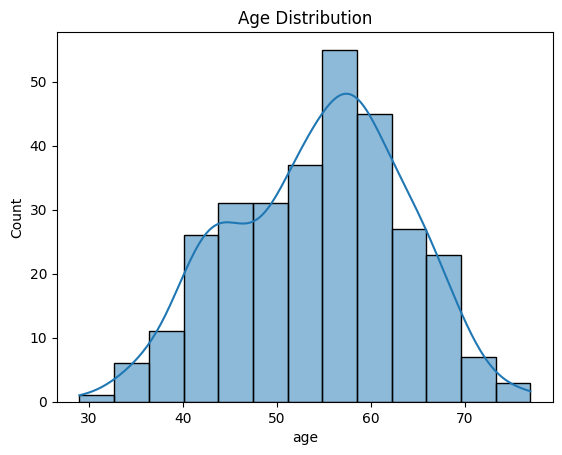

In [33]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

the highest count around the age of 50. 


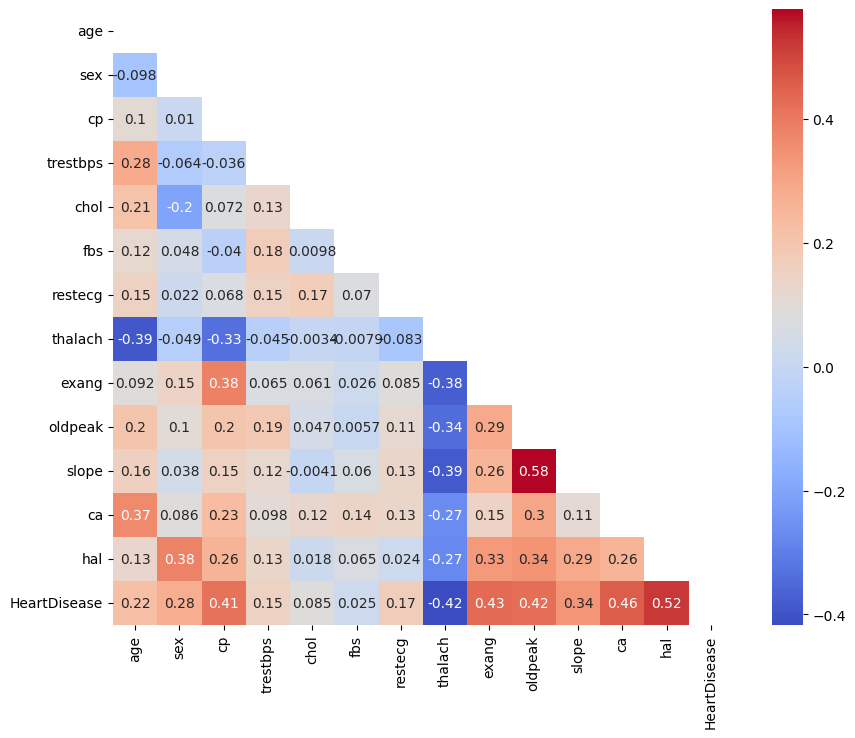

In [34]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()


From the heatmap, we can observe that:

The variable 'thalach' (possibly maximum heart rate achieved) has a moderately strong negative correlation with 'age', 'exang' (exercise-induced angina), and 'oldpeak' (ST depression induced by exercise relative to rest).

'ca' (number of major vessels colored by fluoroscopy) and 'oldpeak' have a relatively strong positive correlation with the variable 'HeartDisease'.

'cp' (chest pain type) has a moderate positive correlation with 'thalach' and a negative correlation with 'exang'.

'sex' has a moderate positive correlation with 'HeartDisease'.

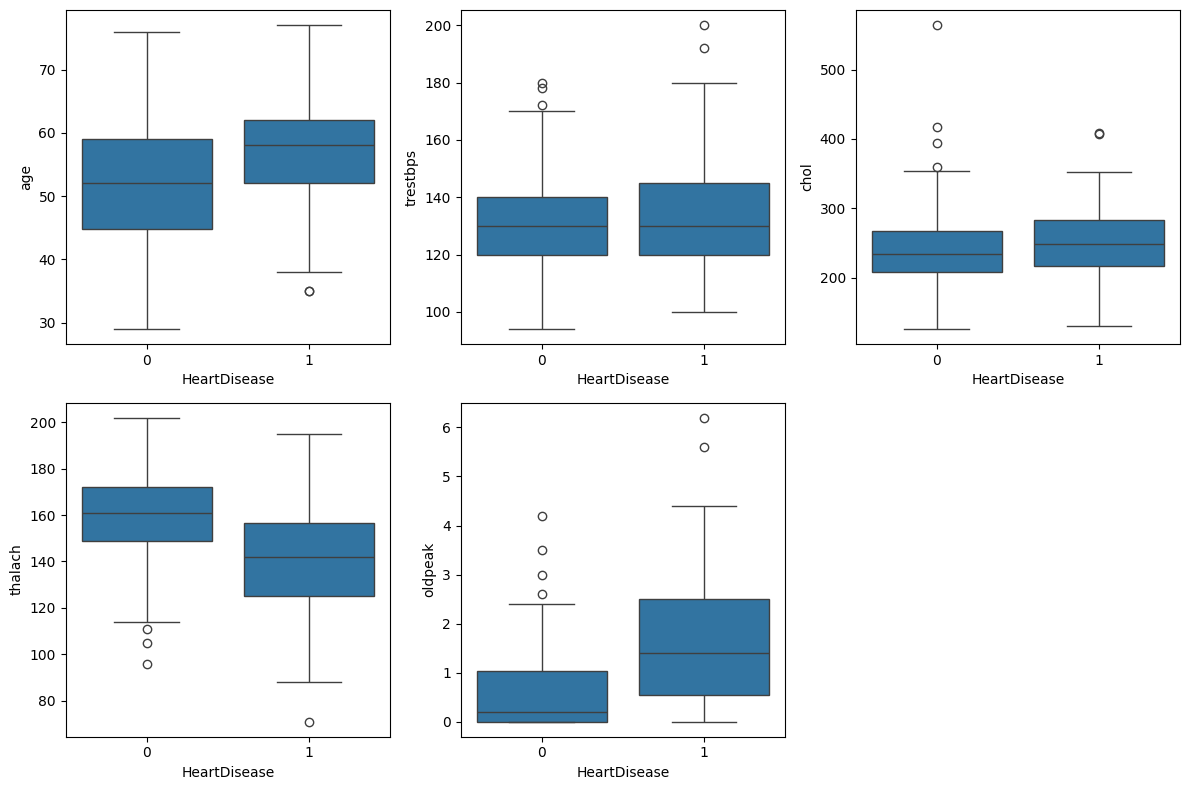

In [35]:

# Outliers
numeric_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=feature, data=df)

plt.tight_layout()
plt.show()

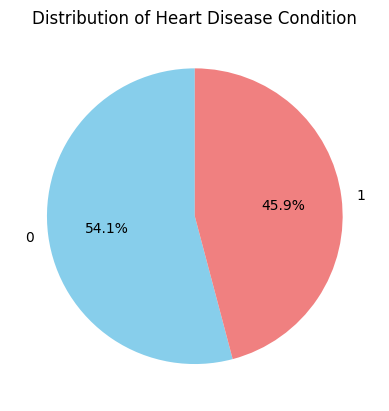

In [36]:
# Percentage distribution of heart disease condition
condition_counts = df['HeartDisease'].value_counts()


plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease Condition')
plt.show()

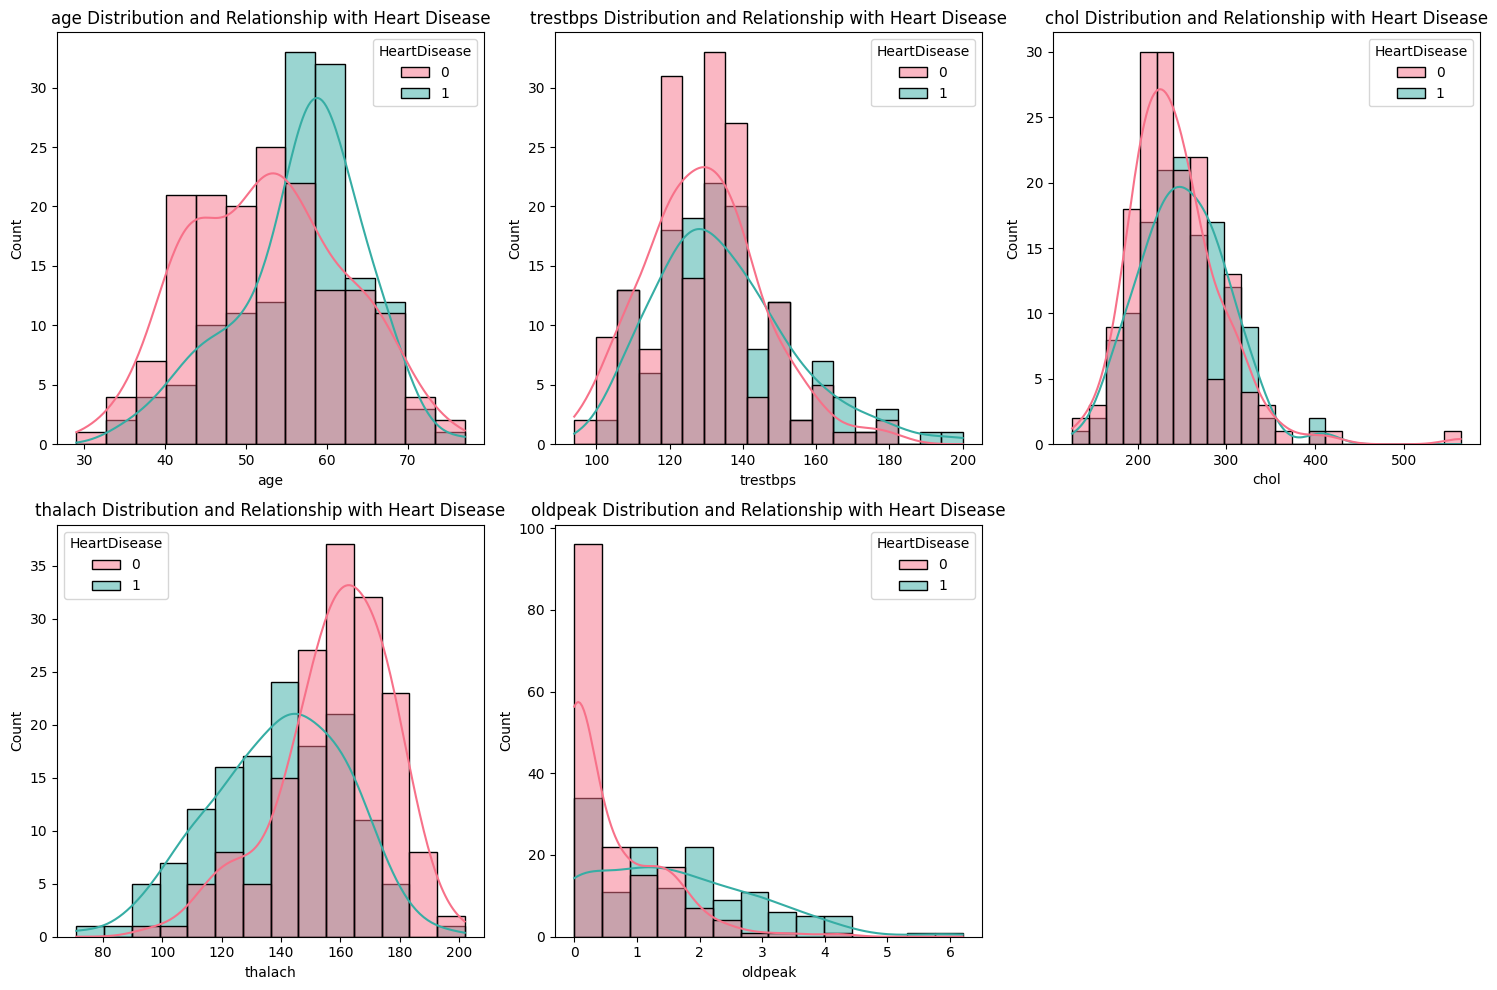

In [37]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, palette='husl')
    plt.title(f'{feature} Distribution and Relationship with Heart Disease')

plt.tight_layout()
plt.show()

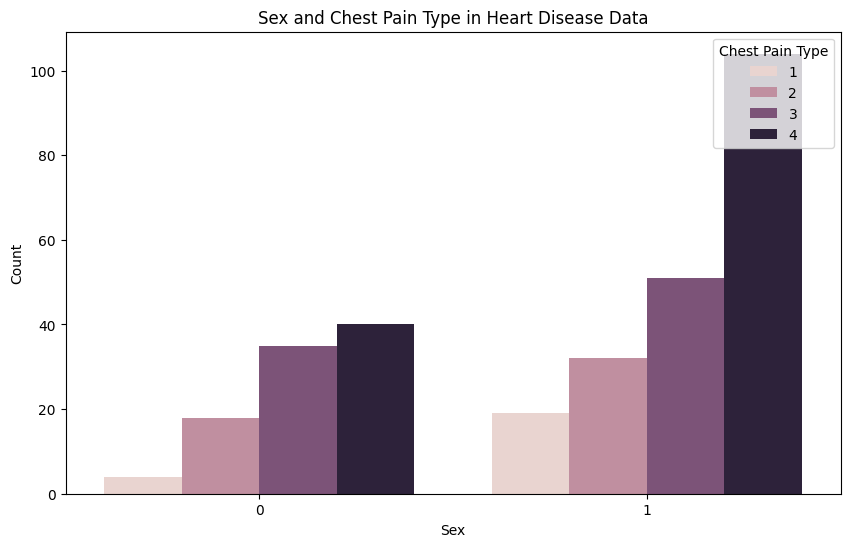

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='cp', data=df)

plt.title('Sex and Chest Pain Type in Heart Disease Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')

plt.show()

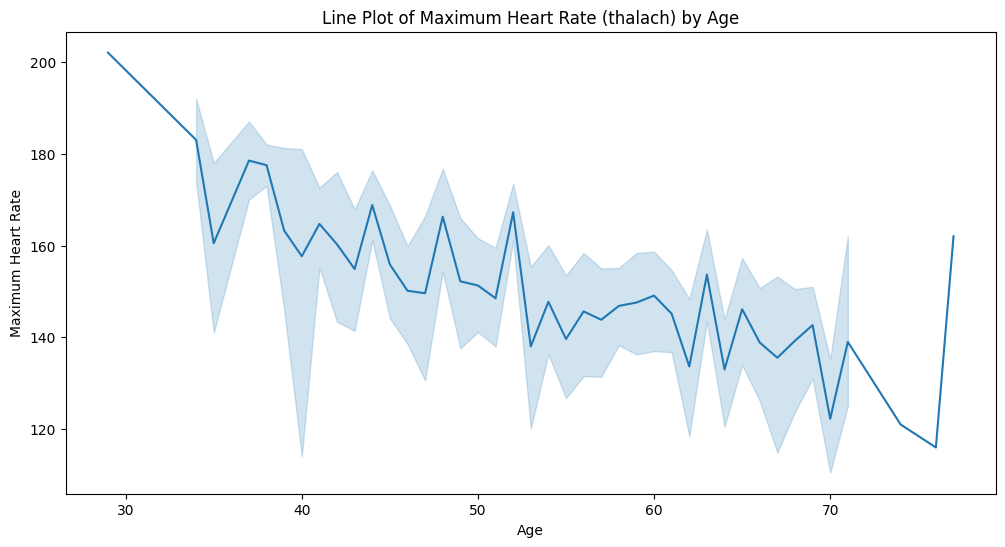

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='thalach', data=df)
plt.title('Line Plot of Maximum Heart Rate (thalach) by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

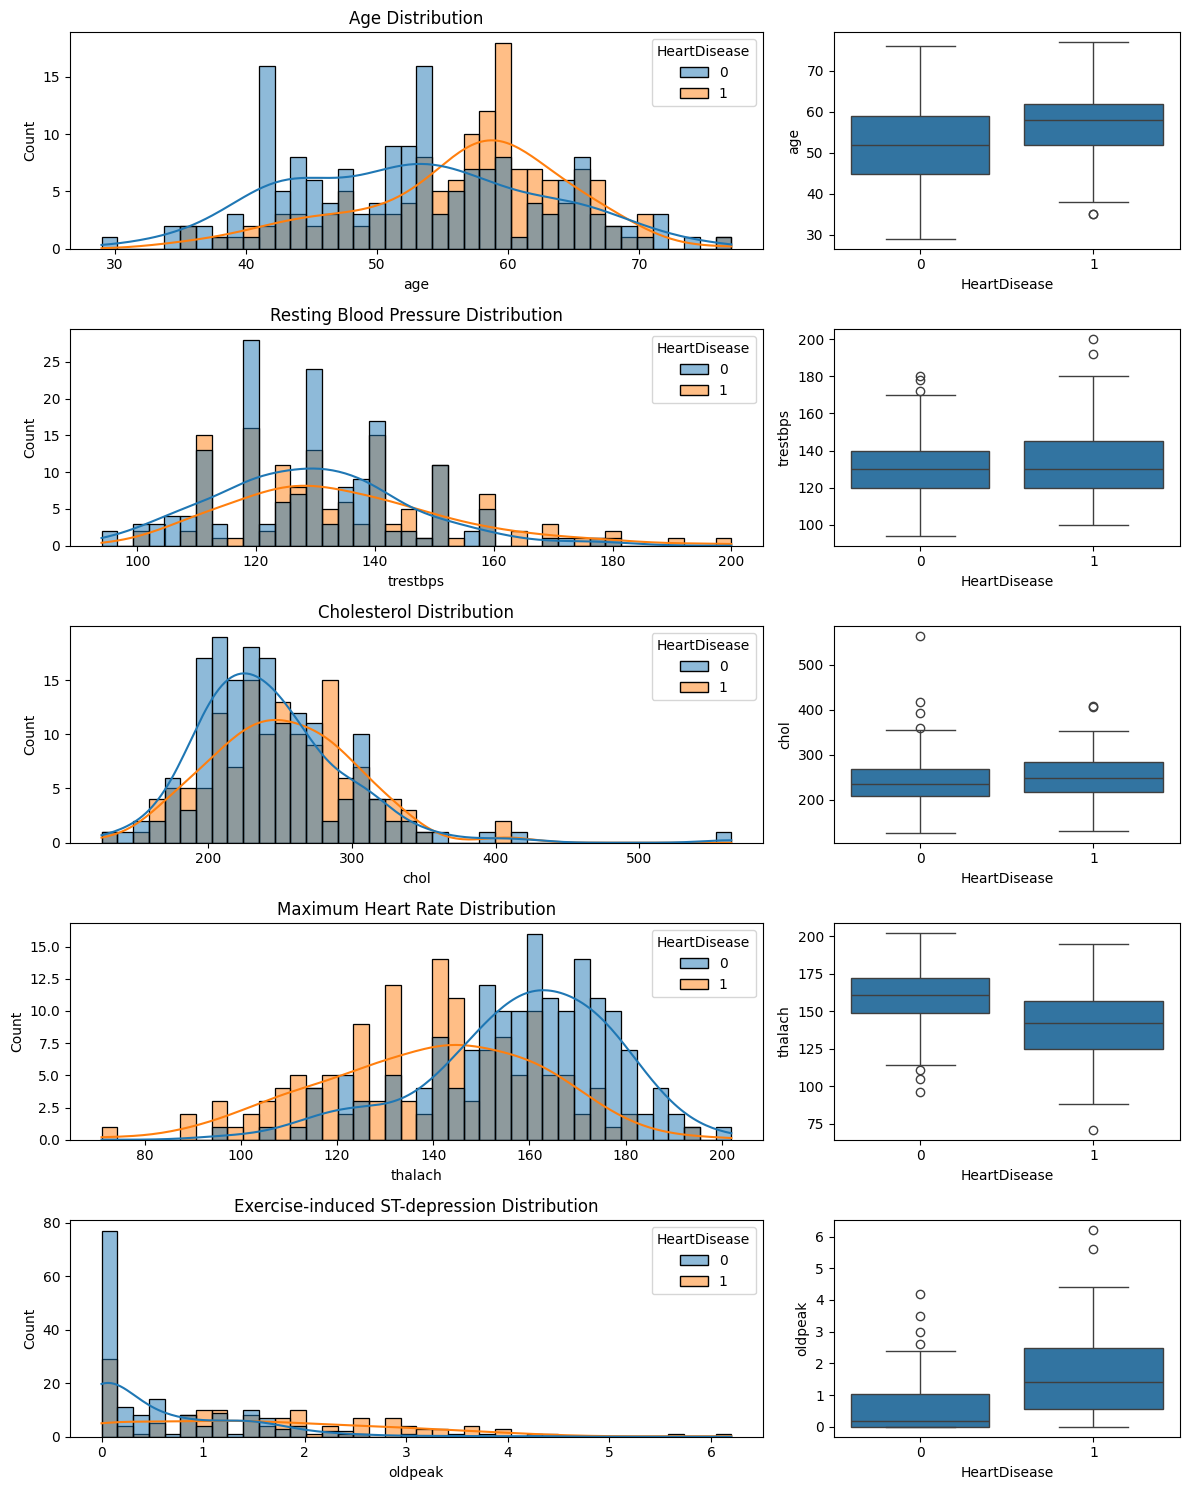

In [40]:
def num_plot_grid(df, attributes, titles, figsize=(12, 15)):

    fig, axes = plt.subplots(len(attributes), 2, figsize=figsize,
                             gridspec_kw={'width_ratios': [2, 1]})
    
    for i, attr in enumerate(attributes):

        sns.histplot(data=df, x=attr, kde=True, hue='HeartDisease', 
                     bins=40,  ax=axes[i,0]) 

        axes[i,0].set_title(titles[i])

        sns.boxplot(data=df, x='HeartDisease', y=attr, ax=axes[i,1])

    plt.tight_layout()
    plt.show()

attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
titles = ['Age Distribution', 'Resting Blood Pressure Distribution', 
          'Cholesterol Distribution', 'Maximum Heart Rate Distribution', 'Exercise-induced ST-depression Distribution']

num_plot_grid(df, attributes, titles)

Older patient are more likely to have heart disease.

Lower heart rate is assoicated with heart disease (negative association, corr -0.42).

Increased ST-depression level is associated with heart disease

<Figure size 640x480 with 0 Axes>

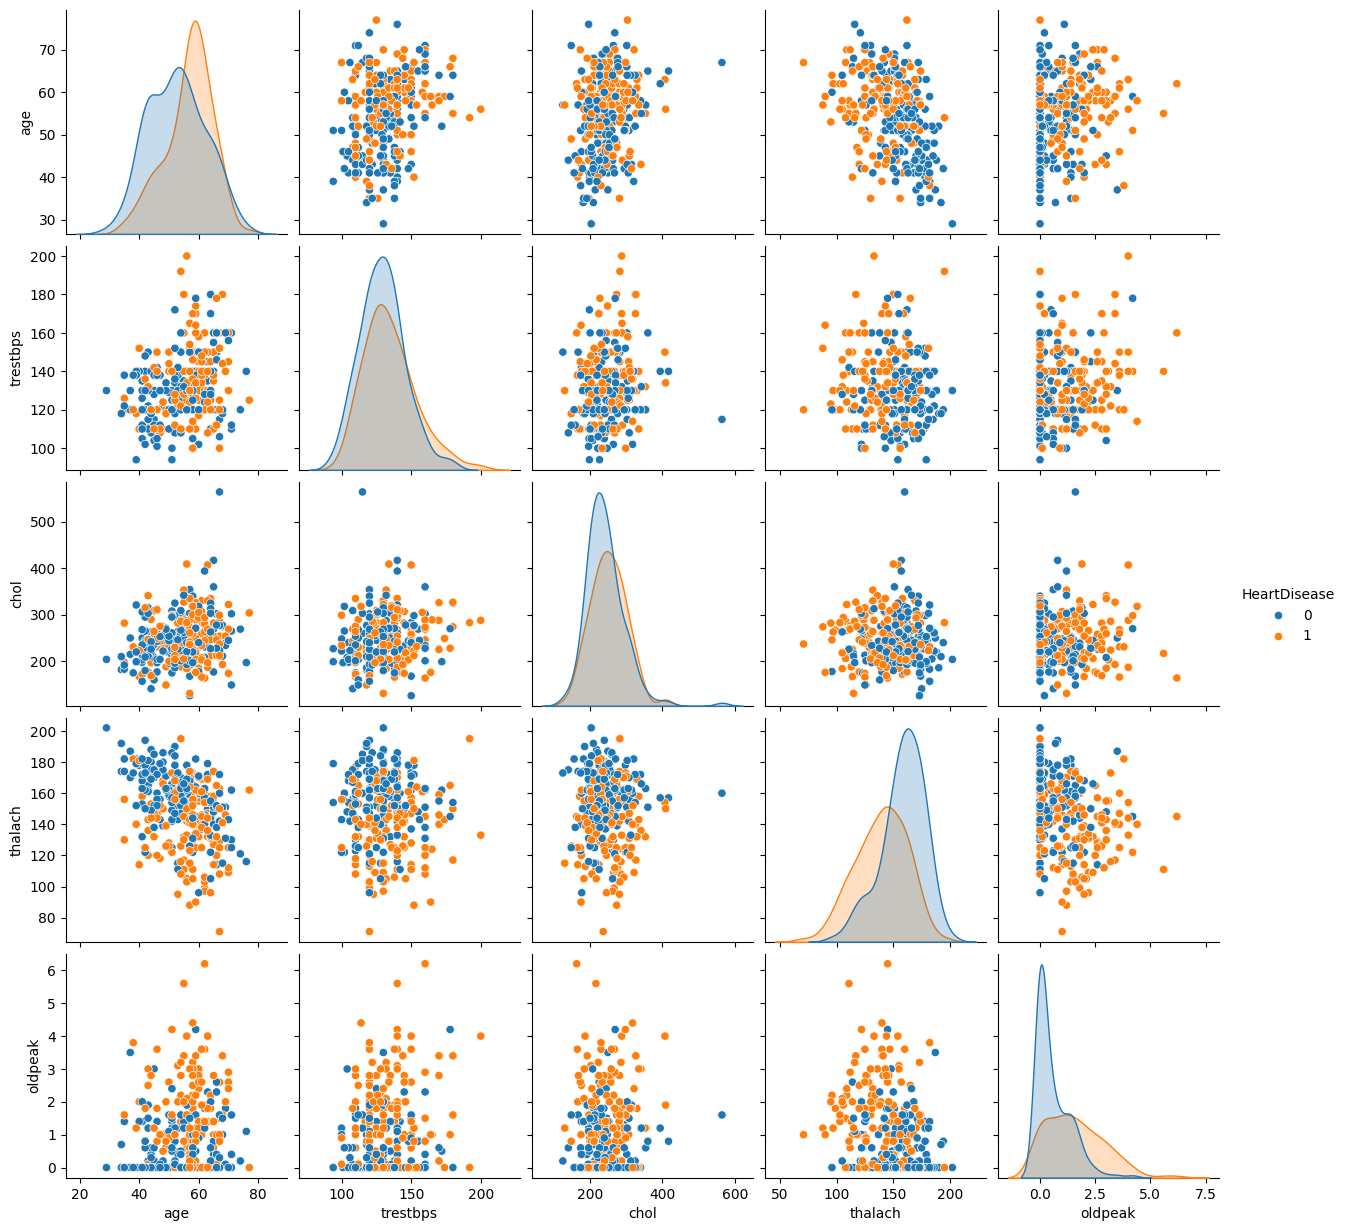

In [41]:
#create pairplot
plt.figure()
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak', 'HeartDisease']], hue='HeartDisease'
           #markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [42]:
X = df.drop(columns=['HeartDisease'],axis=1)
Y = df['HeartDisease']

In [43]:
print(X.shape , Y.shape)

(303, 13) (303,)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [46]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=26,stratify=Y)

In [47]:
scaler = StandardScaler()


In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [49]:
X_train_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,-1.009659,-1.423025,-1.247720,-1.111304,-1.682290,-0.438313,-1.027269,-0.464136,-0.729140,-0.966401,0.625798,-0.713131,-0.929247
1,-1.118885,0.702728,0.856449,-0.646219,-1.507862,-0.438313,-1.027269,-0.204134,1.371478,1.500015,2.254219,-0.713131,0.614536
2,1.502529,0.702728,-0.195636,-0.762490,0.585270,-0.438313,-1.027269,0.099202,-0.729140,-0.085538,-1.002623,0.379133,1.129131
3,0.301047,0.702728,-0.195636,1.097852,-2.341239,2.281475,-1.027269,1.052543,-0.729140,-0.790229,-1.002623,0.379133,1.129131
4,-0.245080,0.702728,-0.195636,0.400223,-0.461296,-0.438313,-1.027269,0.879208,-0.729140,-0.966401,-1.002623,-0.713131,-0.929247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.118885,0.702728,-1.247720,-0.646219,-0.519439,-0.438313,-1.027269,0.922542,-0.729140,-0.966401,-1.002623,-0.713131,-0.929247
238,-0.026629,-1.423025,-0.195636,1.679208,-0.887675,-0.438313,-1.027269,0.619206,-0.729140,-0.966401,-1.002623,0.379133,-0.929247
239,0.410273,0.702728,0.856449,-0.355541,1.031029,-0.438313,0.985679,0.965875,-0.729140,-0.966401,-1.002623,1.471397,1.129131
240,-0.681983,0.702728,0.856449,-0.413676,0.527127,-0.438313,0.985679,0.749207,-0.729140,-0.525970,0.625798,-0.713131,1.129131


In [50]:
X_test_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,-0.791208,0.702728,-0.195636,0.400223,0.197653,-0.438313,0.985679,0.315870,-0.729140,-0.966401,-1.002623,-0.713131,-0.929247
1,-0.245080,0.702728,-2.299804,1.214123,0.992268,2.281475,-1.027269,1.269211,-0.729140,0.090634,0.625798,-0.713131,1.129131
2,1.174852,0.702728,-2.299804,0.400223,0.682174,2.281475,0.985679,1.095876,-0.729140,0.266807,0.625798,0.379133,-0.929247
3,0.191822,-1.423025,-1.247720,0.516495,0.914744,-0.438313,0.985679,0.185869,-0.729140,0.178721,0.625798,-0.713131,-0.929247
4,1.830205,-1.423025,0.856449,-1.111304,-1.895479,-0.438313,-1.027269,-1.027473,-0.729140,0.442979,0.625798,-0.713131,-0.929247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.301047,0.702728,0.856449,1.214123,0.527127,-0.438313,-1.027269,-2.630819,1.371478,0.090634,0.625798,0.379133,1.129131
57,-1.228111,0.702728,-0.195636,-0.064862,1.321742,-0.438313,-1.027269,0.575872,-0.729140,0.707238,-1.002623,0.379133,-0.929247
58,-0.354306,0.702728,-0.195636,-0.355541,-0.034918,2.281475,0.985679,0.749207,-0.729140,1.147670,0.625798,-0.713131,-0.929247
59,-0.245080,-1.423025,-0.195636,0.283952,-0.984579,-0.438313,0.985679,0.879208,-0.729140,-0.878315,0.625798,-0.713131,-0.929247


In [51]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [52]:
# Acc. on training data
X_train_pred = model.predict(X_train_scaled)
train_pred = accuracy_score(X_train_pred, y_train)

print("Accuracy on training Data => ",train_pred)

# Acc. on Test Data
X_test_pred = model.predict(X_test_scaled)
test_pred = accuracy_score(X_test_pred, y_test)
print("Accuracy on test Data => ",test_pred)

Accuracy on training Data =>  0.8677685950413223
Accuracy on test Data =>  0.8032786885245902


In [53]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(train_pred, y_train)
print("Accuracy on training Data => ", train_accuracy)

# Evaluate the best model on the test data
test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(test_pred, y_test)
print("Accuracy on test Data => ", test_accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on training Data =>  0.8677685950413223
Accuracy on test Data =>  0.8032786885245902


In [55]:
from sklearn.svm import SVC

In [56]:
model2 = SVC()
model2.fit(X_train_scaled, y_train)

SVC()

In [57]:
# Acc. on training data
X_train_pred2 = model2.predict(X_train_scaled)
train_pred2 = accuracy_score(X_train_pred2, y_train)

print("Accuracy on training Data => ",train_pred2)

# Acc. on Test Data
X_test_pred2 = model2.predict(X_test_scaled)
test_pred2 = accuracy_score(X_test_pred2, y_test)
print("Accuracy on test Data => ",test_pred2)

Accuracy on training Data =>  0.9297520661157025
Accuracy on test Data =>  0.7540983606557377


In [58]:
from sklearn.metrics import classification_report

In [59]:
# Generate a classification report
report = classification_report(y_test, X_test_pred2)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81        33
           1       0.93      0.50      0.65        28

    accuracy                           0.75        61
   macro avg       0.81      0.73      0.73        61
weighted avg       0.80      0.75      0.74        61



The model shows reasonably good performance with an overall accuracy of 80% on the test set.

Class 0 has higher precision and recall compared to class 1, indicating better performance in predicting instances of class 0.

The macro-average and weighted average metrics provide a balanced summary, considering the performance across both classes.

It's important to further investigate and possibly fine-tune the model based on the specific goals and requirements of the classification problem.

In [60]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_svc = grid_search_svc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_svc)

# Get the best model from the grid search
best_model_svc = grid_search_svc.best_estimator_

# Evaluate the best model on the training data
train_pred_svc = best_model_svc.predict(X_train_scaled)
train_accuracy_svc = accuracy_score(train_pred_svc, y_train)
print("Accuracy on training Data => ", train_accuracy_svc)

# Evaluate the best model on the test data
test_pred_svc = best_model_svc.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(test_pred_svc, y_test)
print("Accuracy on test Data => ", test_accuracy_svc)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on training Data =>  0.859504132231405
Accuracy on test Data =>  0.8032786885245902


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_rf)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the training data
train_pred_rf = best_model_rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(train_pred_rf, y_train)
print("Accuracy on training Data => ", train_accuracy_rf)

# Evaluate the best model on the test data
test_pred_rf = best_model_rf.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(test_pred_rf, y_test)
print("Accuracy on test Data => ", test_accuracy_rf)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on training Data =>  0.9049586776859504
Accuracy on test Data =>  0.8032786885245902


In [63]:
# Generate a classification report
report = classification_report(y_test, test_pred_rf)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        33
           1       1.00      0.57      0.73        28

    accuracy                           0.80        61
   macro avg       0.87      0.79      0.79        61
weighted avg       0.86      0.80      0.79        61



In [64]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test,test_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[33  0]
 [12 16]]


In [65]:
from xgboost import XGBClassifier

In [66]:
# Create an XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_xgb)

# Get the best model from the grid search
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best model on the training data
train_pred_xgb = best_model_xgb.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(train_pred_xgb, y_train)
print("Accuracy on training Data => ", train_accuracy_xgb)

# Evaluate the best model on the test data
test_pred_xgb = best_model_xgb.predict(X_test_scaled)
test_accuracy_xgb = accuracy_score(test_pred_xgb, y_test)
print("Accuracy on test Data => ", test_accuracy_xgb)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy on training Data =>  0.9297520661157025
Accuracy on test Data =>  0.7377049180327869


In [67]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test,test_pred_xgb)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[29  4]
 [12 16]]


In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [85]:
X_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,1.421462,-1.445073,0.859781,-1.462644,-0.432094,-0.423999,-1.024123,-0.344657,-0.722315,-0.699168,-1.000244,1.666547,-0.902396
1,0.978902,-1.445073,0.859781,-0.418096,-0.935666,-0.423999,-1.024123,-0.610589,1.384437,-0.962927,0.640781,-0.674422,-0.902396
2,1.421462,0.692007,0.859781,-0.650217,-0.315885,-0.423999,0.985838,-0.920843,1.384437,1.322977,0.640781,1.666547,1.163033
3,-1.676462,-1.445073,-0.160298,0.394331,-0.490199,-0.423999,-1.024123,0.098564,-0.722315,-0.962927,0.640781,-0.674422,-0.902396
4,0.425701,0.692007,-0.160298,-1.114461,-0.296517,-0.423999,0.985838,0.674750,-0.722315,1.235058,0.640781,0.496062,1.163033


In [86]:
# # Assuming you have new unseen data in a variable named 'new_data_scaled'
new_data_scaled = [['1.421462',	'0.692007',	'0.859781',	'-0.650217',	'-0.315885',	'-0.423999',	'0.985838',	'-0.920843',	'1.384437',	'1.322977',	'0.640781',	'1.666547',	'1.163033']]

# # Make predictions on the new unseen data
new_data_predictions = best_model_rf.predict(new_data_scaled)

# # Print or use the predictions as needed
print("Predictions on New Unseen Data:", new_data_predictions)


Predictions on New Unseen Data: [1]


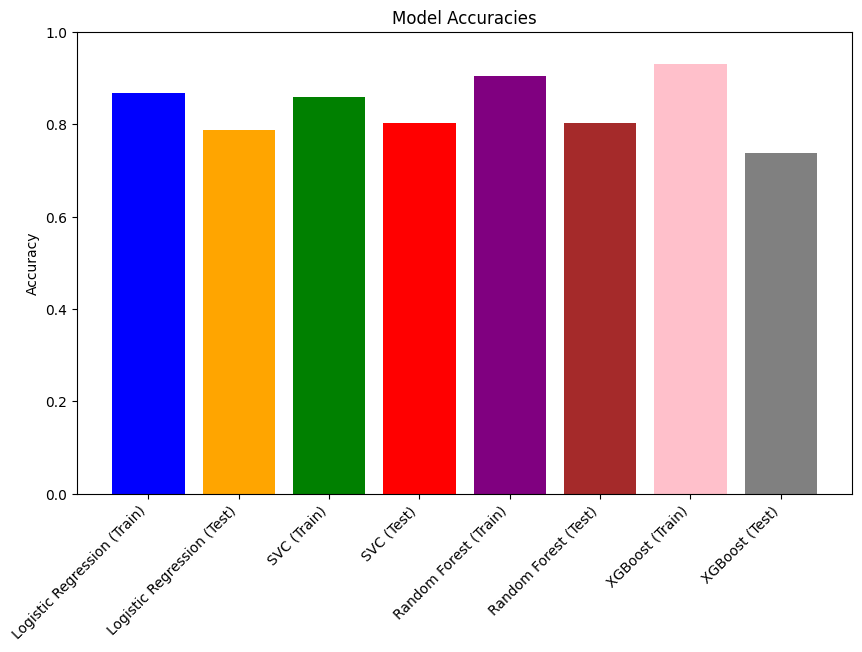

In [68]:
# Accuracy values for each model
accuracies = [train_accuracy, test_accuracy, train_accuracy_svc, test_accuracy_svc,
              train_accuracy_rf, test_accuracy_rf, train_accuracy_xgb, test_accuracy_xgb]

# Model names for the x-axis
models = ['Logistic Regression (Train)', 'Logistic Regression (Test)',
          'SVC (Train)', 'SVC (Test)',
          'Random Forest (Train)', 'Random Forest (Test)',
          'XGBoost (Train)', 'XGBoost (Test)']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.ylim([0, 1.0])  # Set y-axis limits between 0 and 1
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [88]:
import pickle

In [89]:
# Dump the model into a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)

In [90]:
# Save the StandardScaler
scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)